## Extensions to Balanced Colorings and Neutral Landscapes

### Project description:

In this project, you will be asked to extend your last assignment in graph coloring to include finding balanced colorings and exploration of neutral coloring landscapes. Again, we will use the DEAP package in Python to handle the genetic algorithm (GA). 

### Project goals:

1. Use a genetic algorithm to find balanced colorings for a graph
2. Explore the neutrality of graph colorings

### Project question overview:

1. Write a fitness function for the balanced coloring problem. [Question 1 here.](#question1)
2. Paste your fitness function from the Introduction to Graph Coloring Project. (not graded) [Question 2 here.](#question2)
3. Write a function to calculate the 1-step neutrality of a graph. [Question 3 here.](#question3)


## Balanced Coloring Problem

In the previous project, our goal was to find any graph coloring such that no two adjacent vertices have the same color. In the balanced coloring problem, we will keep this definition but add a second constraint. That is a coloring in which no particular color is used more than the rest. To implement this problem we will assume that the inputs and graph representation will be the same as the previous assignment. In the balanced graph coloring problem, the only thing that will change is the fitness function. 

To start, we will reuse the same setup from the previous assignment. This time the ``init_graph()`` function will be supplied for you. 

In [12]:
import random
import numpy as np
from deap import base, creator, tools, algorithms
import math

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)

class AdjNode:
    def __init__(self, value):
        self.vertex = value
        self.next = None


class Graph:
    def __init__(self, num, colors):
        self.n = num
        self.k = colors
        self.graph = [None] * self.n
        self.color_assignment = [None] * self.n
        
    def get_node(self, s):
        return self.graph[s]
        
    # Add edges
    def add_edge(self, s, d):
        node = AdjNode(d)  # creates a new node for the destination half of the edge
        node.next = self.graph[s]  # connects the newly-created node to the existing linked list (at the front)
        self.graph[s] = node  # updates the graph list to include the new node (which points to the rest of the list)

        node = AdjNode(s)
        node.next = self.graph[d]
        self.graph[d] = node
        
def init_graph(file):  
    ##open file to read from
    f = open(file, "r")
    ##store n
    n = int(f.readline())
    ##store k
    k = int(f.readline())
    ##instantiate graph obj
    graph = Graph(n,k)
    
    ##get the rest of the lines
    while True:
        str = f.readline()
        ##break if line is empty
        if not str:
            break
        ##add edge to graph
        pair = str.split()
        print(pair)
        graph.add_edge(int(pair[0]), int(pair[1]))
            
    f.close()
    return graph


def register_ind(graph):
    ##get value for n and k from graph
    n = graph.n
    k = graph.k
    
    ##calculate the size of each individual
    ind_size = math.ceil(math.log2(k))*n
    
    ##register individual and population with toolbox
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=ind_size)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

/nix/store/r5ja4kg8kac6l8z79xswyhdmbqvmy5fb-python3-3.11.9-env/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/nix/store/r5ja4kg8kac6l8z79xswyhdmbqvmy5fb-python3-3.11.9-env/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


### Fitness Function

Recall that a balanced coloring is a coloring where no two adjacent nodes share the same color **and** no color is used more than others. To find such colorings, we will need to adjust the fitness function accordingly. To do so, we will add an extra penalty term to the original fitness function that will reduce the fitness of unbalanced colorings. Let $G=(V,E)$ be a graph with $n$ nodes and $m$ edges. If $c(i)$ is the assigned color of node $i$, then a coloring of a graph is $C(G)=\{c(0), c(1),...,c(n)\}$. For a given edge, $i,j\in E$, let the function $\delta(i,j)=1$ if $c(i)\not = c(j)$, and $\delta(i,j)=0$ if $c(i)=c(j)$. A fitness function for the balanced coloring problem then is:

$$F(C(G)) = \frac{\sum_{i,j\in E}\delta(i,j)}{m}\prod_{j=1}^{k}\frac{|V_j|}{n}$$

where $|V_j|$ is the size of the set of all nodes of color j.
<a id='question1'></a>
# Question 1

Write a fitness function ``eval_balance(graph, indiviudal)`` that computes the fitness of an individual given a graph and an individual. The input will be a graph object and a individual object. The output will be the total fitness of an individual. Use the same individual encoding scheme as in assignment 2. **Remember that if $\lceil log_2(k) \rceil \not= log_2(k)$ then some color encodings will be invalid**. 

In [13]:
from decimal import Decimal, getcontext
def isAdj(graph,a,b):
    
    
    number = graph.n
    last = graph.graph[a]
    last_node = last.vertex
    if last_node == b:
        
        return True
    elif last.next:
        if last.next.vertex == b:
            
            return True
   
    else:
        
        return False
def eval_balance(graph, individual):
    
    
    '''
    Function to compute the fitness of an individual for the graph coloring problem. 
    Inputs: 
        individual: individual object from DEAP toolbox
        graph: graph object containing nodes and edges
    Outputs:
        fitness: fitness of an individual coloring
    '''
    fitness = 0
    number = graph.n
    bit_len = len(individual)
    for n in range(0,bit_len,2):
       
        color_bin = str(individual[n])+str(individual[n+1])
        dec_val = int(color_bin,2)
        if dec_val > graph.k-1:
            return(fitness, )
        node_val = int(n/2)
       
        
        graph.color_assignment[node_val]=dec_val
        
    # your code here
    
    fitValue = 0
    edge_count = 0
    edge_matrix = dict()
    color_matrix = dict() 
    for i in range(number):
       
         for j in range(number):

            if(isAdj(graph,i,j) or isAdj(graph,j,i)):
               edge = str(i)+str(j)
               reverse_edge = str(j)+str(i)
               if (edge not in edge_matrix) and (reverse_edge not in edge_matrix):
                edge_count +=1
                if graph.color_assignment[i] == graph.color_assignment[j]:
                    edge_matrix[edge] = 0
                else:
                    edge_matrix[edge] = 1
              
       
        
        
    for i in range(number):
        if graph.color_assignment[i] in color_matrix:
            color_matrix[graph.color_assignment[i]] +=1
        else:
            color_matrix[graph.color_assignment[i]] =1
    
    color_coefficient = 1
    for color in color_matrix:
        color_coefficient = color_coefficient*color_matrix[color]/number
        
   
    fitValue = sum(edge_matrix.values())
    regular_fitness = (fitValue/edge_count)
    fitness=regular_fitness*color_coefficient
    
    if len(color_matrix) != graph.k:
        fitness = 0
    print(graph.color_assignment) 
    print(color_matrix)
    print(edge_matrix)
    print(fitValue)
    print(edge_count)
    print(regular_fitness)
    return (fitness,)


Your code should return (0.03125,) for input [0, 1, 0, 0, 1, 0, 0, 1]

In [14]:
graph = init_graph("/usercode/graphs/graph_1.txt")
register_ind(graph)

ind = creator.Individual([0, 0, 1, 0, 1, 0, 0, 0])

eval_balance(graph, ind)

['1', '3']
['0', '2']
['2', '1']
[0, 2, 2, 0]
{0: 2, 2: 2}
{'02': 1, '12': 0, '13': 1}
2
3
0.6666666666666666


(0,)

### Evolving the population

Now that we have all of the necessary functions to create a graph and calculate the fitness of an individual, we can create our population and allow it to evolve. Similar to previous project, there are 4 graphs provided. We will need to write a main function that takes a path to the graph file and finds the coloring with the highest fitness. 

In [15]:
def main(file):
    import numpy
    
    graph = init_graph(file)
    register_ind(graph)
    
    toolbox.register("evaluate", eval_balance, graph)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.10)
    toolbox.register("select", tools.selTournament, tournsize=3)
    
    pop = toolbox.population(n=50)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=30, stats=stats, halloffame=hof, verbose=True)
    
    return pop, logbook, hof

['1', '4']
['1', '3']
['2', '0']
['2', '3']
['3', '0']
['3', '4']
['4', '0']
[0, 2, 0, 1, 0]
{0: 3, 2: 1, 1: 1}
{'02': 0, '03': 1, '04': 0, '13': 1, '14': 1, '23': 1, '34': 1}
5
7
0.7142857142857143
[0, 2, 0, 2, 0]
{0: 3, 2: 2}
{'02': 0, '03': 1, '04': 0, '13': 0, '14': 1, '23': 1, '34': 1}
4
7
0.5714285714285714
[0, 2, 0, 2, 0]
{0: 3, 2: 2}
{'02': 0, '03': 1, '04': 0, '13': 0, '14': 1, '23': 1, '34': 1}
4
7
0.5714285714285714
[2, 1, 2, 2, 0]
{2: 3, 1: 1, 0: 1}
{'02': 0, '03': 0, '04': 1, '13': 1, '14': 1, '23': 0, '34': 1}
4
7
0.5714285714285714
[1, 0, 0, 0, 0]
{1: 1, 0: 4}
{'02': 1, '03': 1, '04': 1, '13': 0, '14': 0, '23': 0, '34': 0}
3
7
0.42857142857142855
[1, 0, 0, 1, 2]
{1: 2, 0: 2, 2: 1}
{'02': 1, '03': 0, '04': 1, '13': 1, '14': 1, '23': 1, '34': 1}
6
7
0.8571428571428571
[0, 1, 0, 0, 0]
{0: 4, 1: 1}
{'02': 0, '03': 0, '04': 0, '13': 1, '14': 1, '23': 0, '34': 0}
2
7
0.2857142857142857
[0, 0, 2, 1, 2]
{0: 2, 2: 2, 1: 1}
{'02': 1, '03': 1, '04': 1, '13': 1, '14': 1, '23': 1, '3

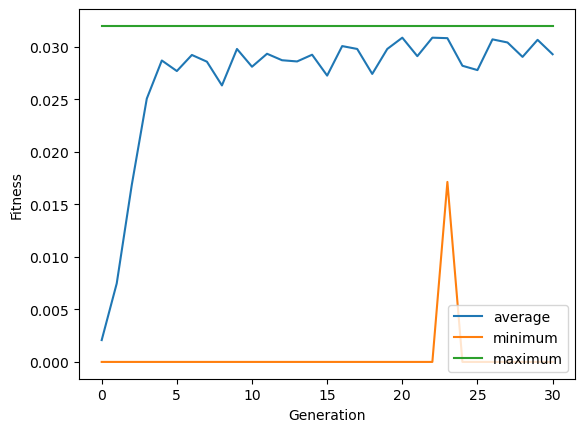

In [20]:
if __name__ == "__main__":
    pop, log, hof = main("/usercode/graphs/graph_2.txt")
    print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness))
    
    import matplotlib.pyplot as plt
    gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
    plt.plot(gen, avg, label="average")
    plt.plot(gen, min_, label="minimum")
    plt.plot(gen, max_, label="maximum")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend(loc="lower right")
    plt.show()

## Neutral Landscapes

In this section of the project, we will explore the neutrality of graph colorings. A mutation to an individual is *neutral* if it does not affect the fitness of that individual.

First, you will need to implement 1-step neutrality. That is, starting with a single valid coloring, make copies in which one gene is changed to one of the other valid colors. Performing this process should produce $n*(k-1)$ individuals. You will then report the fraction of those individuals that have the same fitness as the original coloring.
<a id='question2'></a>
# Question 2

Below, you will copy and paste your ``eval_graph(graph, individual)`` function from assignment 2 to use as a helper function for question 3. 

In [26]:
def eval_graph(graph, individual):
    
    '''
    Function to compute the fitness of an individual for the graph coloring problem. 
    Inputs: 
        individual: individual object from DEAP toolbox
        graph: graph object containing nodes and edges
    Outputs:
        fitness: fitness of an individual coloring
    '''
    fitness = 0
    number = graph.n
    bit_len = len(individual)
    for n in range(0,bit_len,2):
       
        color_bin = str(individual[n])+str(individual[n+1])
        dec_val = int(color_bin,2)
        if dec_val > graph.k-1:
            return(fitness, )
        node_val = int(n/2)
       
        
        graph.color_assignment[node_val]=dec_val
        
    # your code here
    
    fitValue = 0
    edge_count = 0
    edge_matrix = dict()
    color_matrix = dict()
    for i in range(number):
       
         for j in range(number):

            if(isAdj(graph,i,j) or isAdj(graph,j,i)):
               edge = str(i)+str(j)
               reverse_edge = str(j)+str(i)
               if (edge not in edge_matrix) and (reverse_edge not in edge_matrix):
                edge_count +=1
                if graph.color_assignment[i] == graph.color_assignment[j]:
                    edge_matrix[edge] = 0
                else:
                    edge_matrix[edge] = 1
              
       
    for i in range(number):
        if graph.color_assignment[i] in color_matrix:
            color_matrix[graph.color_assignment[i]] +=1
        else:
            color_matrix[graph.color_assignment[i]] =1
        

        
        
   
    fitValue = sum(edge_matrix.values())
    fitness = fitValue/edge_count
    if len(color_matrix) != graph.k:
        fitness = 0

    return (fitness,)

<a id='question3'></a>
# Question 3

Write the function ``one_neutral(graph, individual)`` that computes the neutrality of single mutations (the fraction of mutations that result in the same fitness that the original coloring produced). The inputs will be a graph object and an individual object and the output will be the neutrality.

In [77]:
import numpy as np
def one_neutral(graph, individual):
    '''
    Function to compute the neutrality of a graph. 
    Inputs: 
        individual: individual object from DEAP toolbox
        graph: graph object containing nodes and edges
    Outputs:
        neutrality: neutrality of the graph
    '''
    original_fitness = eval_graph(graph,individual)
    original_ind = np.array(individual)
    number = graph.n
    bit_len = len(individual)
    mut_count = 0
    match_count = 0
    for bit in range(0,bit_len,2):
        
        mut = original_ind.copy()
       
        
        cur = str(individual[bit])+str(individual[bit+1])
        print(cur)
        
        for c in range(graph.k):
            result = bin(c)[2:].zfill(2)
            if cur != result:
                mut_count+=1
               
                
                mut[bit] = int(result[0])
                mut[bit+1] = int(result[1])
                print(mut)
                mut_fit  = eval_graph(graph,mut)
                if mut_fit == original_fitness:
                    match_count+=1
                    
            
        
        
    # your code here
    print(mut_count)
    print(match_count)
    neutrality = match_count/mut_count
    
    return neutrality
    

Your code should return 0.25 for input \[0, 1, 0, 0, 1, 0, 0, 1\]; check that it does:

In [78]:
graph = init_graph("/usercode/graphs/graph_1.txt")
register_ind(graph)

ind = creator.Individual([0, 1, 0, 0, 1, 0, 0, 1])

one_neutral(graph, ind)

['1', '3']
['0', '2']
['2', '1']
01
[0 0 0 0 1 0 0 1]
[1 0 0 0 1 0 0 1]
00
[0 1 0 1 1 0 0 1]
[0 1 1 0 1 0 0 1]
10
[0 1 0 0 0 0 0 1]
[0 1 0 0 0 1 0 1]
01
[0 1 0 0 1 0 0 0]
[0 1 0 0 1 0 1 0]
8
2


(1.0,)